<font color='steelblue'>

# Tarea 2

<font color='purple' size=4>

Diego González Baños

<font color='black'>

Para realizar la siguiente tarea puedes apoyarte de las funciones de la notebook correspondiente a la clase 3. 

<font color='steelblue'>

1. Importa las librerías que vas a utilizar (numpy, matplotlib, etc.)

In [1]:
#Importamos las librerías que se usarán

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# To have a reproducible code we use a random seed
np.random.seed(3)

<font color='steelblue'>

2. Modifica la siguiente función para que los datos generados tengan la siguiente tendencia:
    
    $$𝐹(𝑥,𝑤,𝑏)=1.7159∗𝑡𝑎𝑛ℎ(𝑤𝑒𝑖𝑔ℎ𝑡∗𝑥+𝑏𝑖𝑎𝑠)$$

In [2]:
def generador_datos_simple(n_points, distance_0, measuring_time, speed, max_distance_error):

    x = np.random.random(n_points) * measuring_time
    
    error = np.random.randn(n_points) * max_distance_error

    y = 1.7159*np.tanh(distance_0 + speed*x) + error

    return x, y


<font color='steelblue'>

3. Genera el conjunto de datos x,y con la tendencia anteriormente mencionada y graficalos.

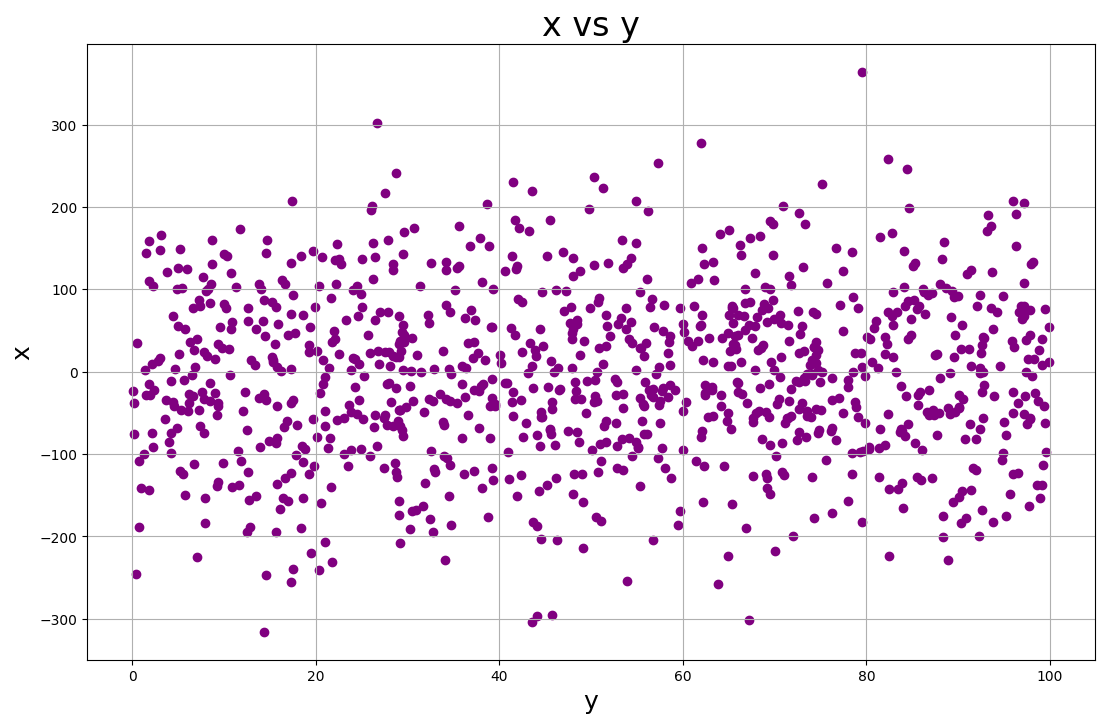

In [3]:
n_points =1000 # indica un valor
distance_0 =100.0 # indica un valor
measuring_time =100.0 # indica un valor
speed =20.0 # indica un valor
max_distance_error =100 # indica un valor

x, y = generador_datos_simple(n_points, distance_0, measuring_time, speed, max_distance_error)
plt.figure(figsize=(13,8))
plt.scatter(x, y, color= 'purple')
plt.grid(True)
plt.title('x vs y', size=24)
plt.xlabel('y', size=18)
plt.ylabel('x', size=18);

<font color='steelblue'>

4. Grafica el histograma de tus dos variables, qué puedes observar de los datos que generaste?
    
[matplotlib.pyplot.hist](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html)

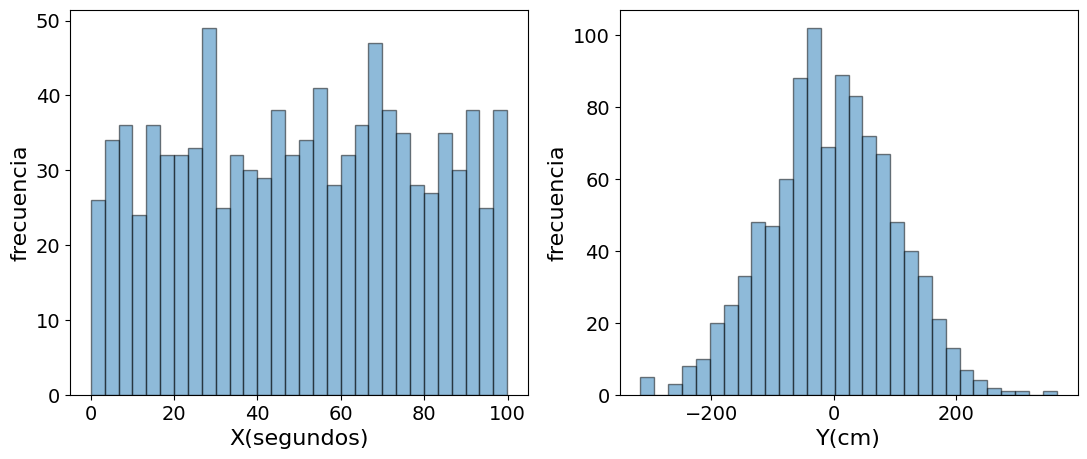

In [4]:
# Escribe el código aquí
plt.figure(figsize=(13,5))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

plt.subplot(1, 2, 1)
plt.hist(x, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('X(segundos)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16)


plt.subplot(1, 2, 2)
plt.hist(y, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('Y(cm)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16);

<font color='steelblue'>

4. Separa las muestras en los conjuntos de entrenamiento y prueba. Deja la mayoría de los datos para el conjunto de entrenamiento.
    
    4.1 Reordena los datos de manera aleatoria
    
    4.2 Divide los datos en los conjuntos de entrenamiento y prueba
    
    4.3 Grafica los datos de cada conjunto
   

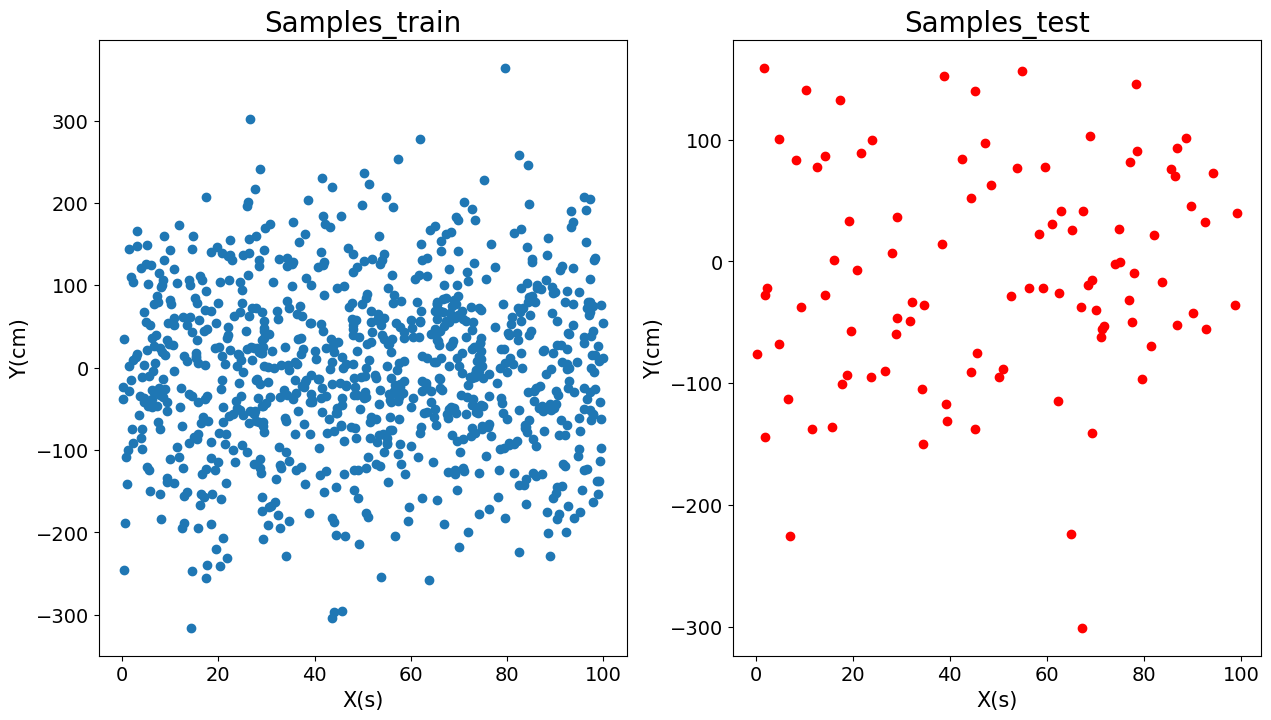

In [5]:
# Escribe el codigo aquí
# Los datos se cambian de posicion aleatoriamente

from random import shuffle

c = list(zip(x, y))

shuffle(c)

(x, y) = zip(*c)

#print(len(x), len(y))

# Los datos se dividen

samples_train = (x[0:int(0.90*len(x))], y[0:int(0.90*len(y))])
#print(len(samples_train[0]), len(samples_train[1]))

samples_test = (x[int(0.90*len(x)):], y[int(0.90*len(y)):])

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.scatter(samples_train[0], samples_train[1])
plt.title('Samples_train', size=20)
plt.xlabel('X(s)', size =15)
plt.ylabel('Y(cm)', size =15)
plt.subplot(1, 2, 2)
plt.scatter(samples_test[0], samples_test[1], color='red')
plt.title('Samples_test', size=20)
plt.xlabel('X(s)', size =15)
plt.ylabel('Y(cm)', size =15);

<font color= steelblue>

Lo que sigue es hacer el ajuste con la función $𝐹(𝑥,𝑤,𝑏)=1.7159∗𝑡𝑎𝑛ℎ(𝑤𝑒𝑖𝑔ℎ𝑡∗𝑥+𝑏𝑖𝑎𝑠)$ y determinar el peso (weight) y bias óptimos. 
    
En este caso

$$ MSE = \dfrac{1}{m}∑_{i=1}^{m}(y_i-F(x_i,w,b))^{2} = \dfrac{1}{m}∑_{i=1}^{m}(y_i - 1.7159tanh(𝑤\cdot𝑥_i+𝑏))^2 $$

Obten las siguientes derivadas:
    

$$\dfrac{\partial MSE(w, b)}{\partial w}=-2(y_{i} - 1.7159tanh(wx_{i}+b))(1.7159(1-tanh^2(wx_{i}+b))(x_{i}))$$

    
 
$$ \dfrac{\partial MSE(w, b)}{\partial b}=-2(y_{i} - 1.7159tanh(wx_{i}+b))(1.7159(1-tanh^2(wx_{i}+b))) $$

    

In [6]:
# Definimos la función tanh(x) y su derivada
def tanh(x):
    # escribe el codigo aquídef tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))


def d_tanh(x):
    # escribe el codigo aquí
    return (1-(tanh(x))**2)

In [7]:
#Definimos la función F(x,w,b) = 1.7159∗𝑡𝑎𝑛ℎ(𝑤𝑒𝑖𝑔ℎ𝑡∗𝑥+𝑏𝑖𝑎𝑠)
def F(x,w,b):
    y = w*x + b 
    return 1.7159*tanh(y)

<font color= steelblue>
    
5. Completa la siguiente función, indicando las derivadas que calculaste anteriormente para la función de costo (MSE en este caso) con respecto a los parámetros w y b.

In [8]:
x_=samples_train[0]
y_=samples_train[1]

In [9]:
#Function to upgrade weight and bias
def training(x_, y_, weight, bias, alpha, epochs, val_ratio=0.1):
    
    '''
    Esta función usa una relación no lineal para actualizar los parámetros (w,b) con el método gradient descent
    Además separa a x e y en dos conjuntos: train y validation usando el val_ratio
    
    INPUT
        x,y: muestras
        weight: peso inicial
        bias: bias inicial
        alfa: learning rate
        epochs: int que define el numero de veces a actualizar a los parámetros
        val_ratio: porcentaje de los datos (x,y) a usar como conjunto de validación
    OUTPUT
        weights: lista con los pesos actualizados en cada iteración
        biases: lista con los bias actualizados en cada iteración
        costs: lista con los residuos actualizados en cada iteración para el conjunto de entrenamiento
        costs_val: lista con los residuos actualizados en cada iteración para el conjunto de validación'''
    
    #1. inicializacion de parametros
    
    x = np.squeeze(x_)
    y = np.squeeze(y_)
    alpha = alfa
    costs = 0
    d_w = 0.0
    d_b = 0.0
    m = len(x)

    #2.  Especificaciones de las graficas
    
    plt.figure(figsize=(13,8)) 
    plt.title('Cost vs epoch', size=24)
    plt.xlabel('epoch', size=18)
    plt.ylabel('Cost', size=18)
    
    #3. Separación de muestras en los conjuntos train y validation
    
    train_ratio = int((1.0-val_ratio)*len(x))  
   
    samples_train = (x[0:train_ratio], y[0:train_ratio])
    samples_val = (x[train_ratio:], y[train_ratio:])
    x_train = samples_train[0]
    y_train = samples_train[1]
    x_val = samples_val[0]
    y_val = samples_val[1]
    
    #3.1 Normalización
    
    mean_x = np.mean(x_train)
    std_x = np.std(x_train)
    
    mean_y = np.mean(y_train)
    std_y = np.std(y_train)
    
    x_train = (x_train-mean_x)/std_x
    y_train = (y_train-mean_y)/std_y
    x_val = (x_val-mean_x)/std_x
    y_val = (y_val-mean_y)/std_y
    
    #4. Calculo del costo por epoca para ambos conjuntos y ajuste con el conjunto train
       
    weights = []
    biases = []
    costs = []
    costs_val = []
    
    m_train = len(x_train)
    m_val = len(x_val)
    
    for i in range(epochs):

        # calculo de derivadas y el costo para el conjunto train
        cost = 0.0
        cost_val = 0.0
        
        for j in range(m_train):

            d_w += -2*(y[j]-1.7159*tanh(weight*x[j]+bias))*(1.7159*(1-tanh(weight*x[j]+bias))**2*x[j])# indica la derivada de MSE con respecto a w
            d_b += -2*(y[j]-1.7159*tanh(weight*x[j]+bias))*(1.7159*(1-tanh(weight*x[j]+bias))**2) # indica la derivada de MSE con respecto a b
            cost += (y_train[j] - F(x_train[j],weight,bias))**2

        cost /= m_train
        d_w /= m_train
        d_b /= m_train
        
        # calculo del costo de las muestras de validación 
        for j in range(m_val):
            cost_val += (y_val[j] - F(x_val[j],weight,bias))**2
        cost_val /= m_val
               
        #se agregan los valores a las listas
        weights.append(weight)      
        biases.append(bias)
        costs.append(cost)
        costs_val.append(cost_val)
        
        #5. Actualizacion de los parametros

        weight = weight - alpha*d_w
        bias = bias - alpha*d_b
        
        #6. graficamos
        plt.grid(True)
        plt.scatter(i, cost, color='blue')
        plt.scatter(i, cost_val, color='red')
    plt.legend(['train', 'validation'],loc=0);

    return weights, biases, costs, costs_val, mean_x, std_x, mean_y, std_y

<font color = "steelblue">

 6. Inicializa los parámetros y entrena al modelo

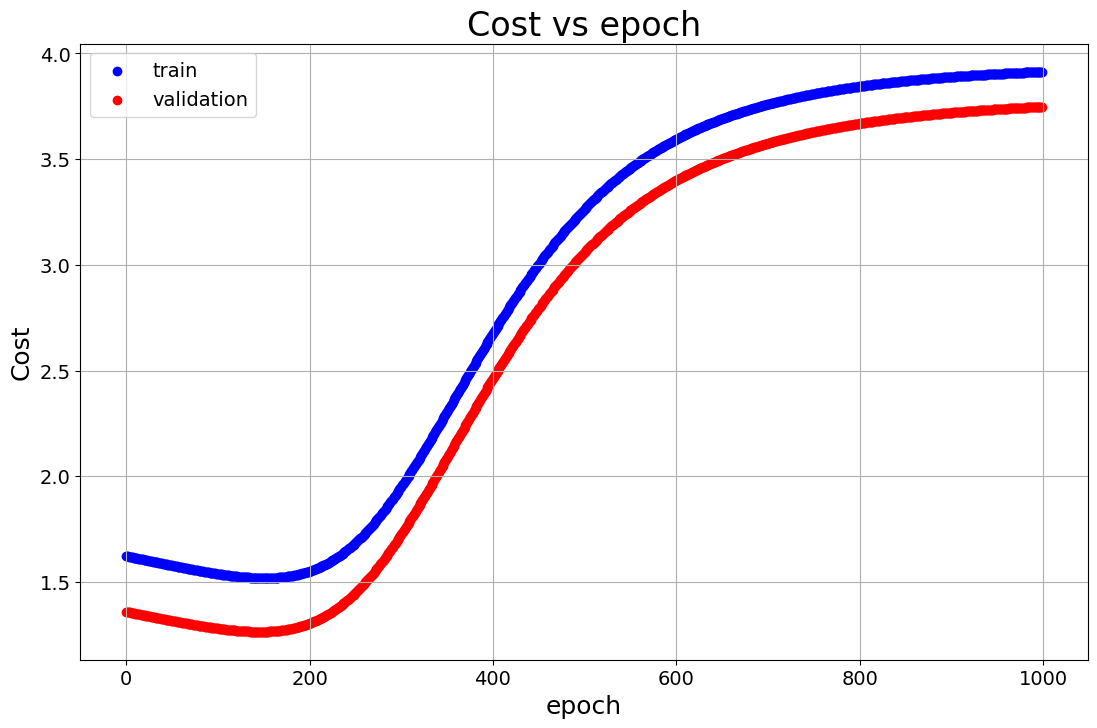

In [10]:
weight_0 = np.random.random()# inicializa de manera aleatoria y reproducible
bias_0 = np.random.random()# inicializa de manera aleatoria y reproducible
alfa = .001# indica algun valor para el learning rate
epochs = 1000#  indica el numero de epocas
val_ratio = 0.1# indica el % de muestras a utilizar para validar el modelo

# entrena el modelo
weights, biases, cost, cost_val, mean_x, std_x, mean_y, std_y = training (x_, y_, weight_0, bias_0, alfa, epochs, val_ratio)

<font color = "steelblue">

7. Calcula el costo para el conjunto de prueba
    
 7.1 Normaliza el conjunto de prueba
    
 7.2 Calcula el costo utilizando los parámetros óptimos encontrados en el ejercicio aterior

In [11]:
#Definimos la función de costo
def MSE(x, y, weight, bias):

    r = 0

    m = len(x)

    for i in range(m):

        r += np.sum((y[i]-1.7159*tanh(weight*x[i] - bias))**2)

    r /= m

    return r

In [12]:
#Normalizamos los valores
mean_distance = np.mean(y_)
std_distance = np.std(y_)

ajustar_y = (y_-mean_distance)/std_distance

mean_time = np.mean(x_)
std_time = np.std(x_)

ajustar_x = (x_-mean_time)/std_time

In [13]:
#Calculamos el costo para el conjunto de prueba
test_y = (samples_test[1]-mean_distance)/std_distance

test_x = (samples_test[0]-mean_time)/std_time

print("MSE_prueba =  %.5f" %MSE(test_x, test_y, weights[-1], biases[-1]))

MSE_prueba =  3.95070


<font color = "steelblue">
    
8. Realiza algunas inferencias utilizando los datos de prueba

In [14]:
#Inferencias
def inference(t, w, b, mean_t, std_t, mean_y, std_y) :

    t = (t-mean_t) / std_t
    d = w * t + b

    d = d * std_y + mean_y

    return d


In [15]:
#El tiempo esta dado en las unidades con los que se recolectaron los datos, segundos
tiempos = [1.65, 32.20, 43.5, 84.7]

for t in tiempos :
    distance = inference(t,weights[-1], biases[-1], mean_time, std_time, mean_distance, std_distance)

    print ("Para el tiempo de {0:5.2f} s la distancia inferida es {1:6.2f} cm ".format(t,distance))

Para el tiempo de  1.65 s la distancia inferida es -720.20 cm 
Para el tiempo de 32.20 s la distancia inferida es -554.84 cm 
Para el tiempo de 43.50 s la distancia inferida es -493.68 cm 
Para el tiempo de 84.70 s la distancia inferida es -270.68 cm 
